In [81]:
import glob,random,os,cv2
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

In [82]:
TRAIN_DIR = './data/train/'
TEST_DIR = './data/test/'

In [83]:
train_images = [TRAIN_DIR + fname for fname in os.listdir(TRAIN_DIR)]
train_dogs = [TRAIN_DIR + fname for fname in os.listdir(TRAIN_DIR) if 'dog' in fname]
train_cats = [TRAIN_DIR + fname for fname in os.listdir(TRAIN_DIR) if 'cat' in fname]
test_images = [TEST_DIR + fname for fname in os.listdir(TEST_DIR)]

In [84]:
train_images = train_dogs[:1000] + train_cats[:1000]
random.shuffle(train_images)
test_images = test_images[:25]

In [85]:
print(f"train_images:{len(train_images)} test_images:{len(test_images)} train_dogs:{len(train_dogs)} train_cat:{len(train_cats)}")

train_images:2000 test_images:25 train_dogs:12500 train_cat:12500


In [86]:
ROWS = 64
COLS = 64
CHANNELS = 3

In [87]:
def read_image(fpath):
  img = cv2.imread(fpath,cv2.IMREAD_COLOR)
  return cv2.resize(img,(ROWS,COLS),interpolation=cv2.INTER_CUBIC)

In [88]:
def prep_data(images):
  count = len(images)
  data = np.ndarray((count,CHANNELS,ROWS,COLS),dtype=np.uint8)

  for i,image_file in enumerate(images):
    image = read_image(image_file)
    data[i] = image.T
    if i%250 == 0: print(f'Processed {i} of {count}')
  
  return data

In [89]:
train = prep_data(train_images)
test = prep_data(test_images)

Processed 0 of 2000
Processed 250 of 2000
Processed 500 of 2000
Processed 750 of 2000
Processed 1000 of 2000
Processed 1250 of 2000
Processed 1500 of 2000
Processed 1750 of 2000
Processed 0 of 25


In [90]:
print(f"train:{train.shape} test:{test.shape}")

train:(2000, 3, 64, 64) test:(25, 3, 64, 64)


Text(0.5, 1.0, 'Cats and Dogs')

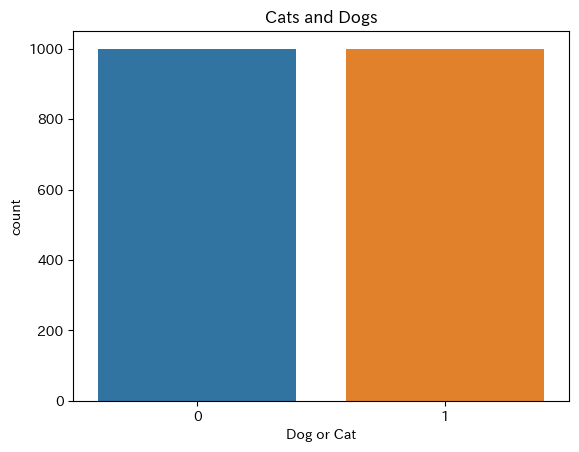

In [103]:
labels = []
for i in train_images:
  if 'dog' in i:
    labels.append(1)
  else:
    labels.append(0)

sns.countplot(data=pd.DataFrame(labels),x=0)
plt.xlabel('Dog or Cat')
plt.title('Cats and Dogs') 

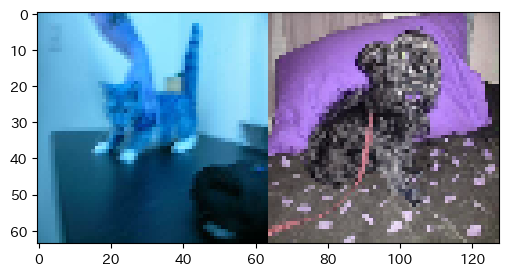

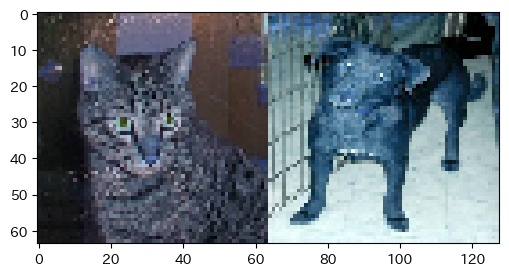

In [107]:
def show_cats_and_dogs(idx):
  cat = read_image(train_cats[idx])
  dog = read_image(train_dogs[idx])
  pair = np.concatenate((cat,dog),axis=1)
  plt.figure(figsize=(6,3))
  plt.imshow(pair)
  plt.show()

for idx in range(0,2):
  show_cats_and_dogs(idx)